In [1]:
#%matplotlib qt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


df = pd.read_excel("ts_medical_data_recleaned-14C.xlsx",index_col=0)
df



,year,month,Identificacion,1.Proteinuria1.g/L,2.Microalbuminuria1,3.HbA1C.1,4.Creatinuria.1,5.Creatinina.1,6.Glucemia1,7.Edad,...,39.Proteinuria2,40.Proteinuria3,41.FECHA.Proteinuria3,42.Microalbuminuria2,43.FECHA.Microalbuminuria2,44.Microalbuminuria3,44.FECHA.Microalbuminuria3,45.ParcialOrina,46.Corrected.TFG,47.Estadofinal
0,2013,2,562970,0.100,NaN,NaN,NaN,0.90,NaN,88.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,55.56,NaN
1,2013,10,562970,0.039,NaN,NaN,NaN,1.11,NaN,89.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,45.05,NaN
2,2014,12,562970,0.053,NaN,NaN,NaN,1.03,NaN,90.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,48.54,NaN
3,2015,12,562970,0.240,NaN,NaN,NaN,1.20,NaN,91.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,41.47,NaN
4,2017,3,562970,0.048,20.0,5.9,1320.0,1.19,82.0,92.0,...,23.0,19.0,2017-04-20,10.0,2016-11-25,10.0,2017-04-20,INACTIVO,42.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,2017,1,22096224,0.200,NaN,NaN,1987.0,0.93,115.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,46.26,vivo
4488,2017,4,22096224,0.250,2000.0,6.4,1765.0,1.05,130.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,40.30,vivo
4489,2017,7,22096224,NaN,1600.0,7.0,990.0,1.46,138.0,78.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,17.19,Fallecido
4490,2015,4,21599285,NaN,58.0,7.6,1900.0,0.89,127.0,87.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,18.89,vivo


In [2]:
df.columns

Index(['year', 'month', 'Identificacion', '1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '8.Sexo', '9.Nivel.ingresos',
       '10.Nivel.ingresos', '11.Estado.civil', '12.Tipo.afiliacion.SGSSS',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '18.EstadioRenal1', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria', '32.EPS',
       '33.IPS', '34.TipoID', '35.Fecha.ultimavalidacion',
       '36.creatinina3.mgdl', '37.TFG.calculada', '38.EstadioRenal2.calculado',
       '39.Proteinuria2', '40.Proteinuria3', '41.FECHA.Proteinuria3',
       '42.Microalbuminuria2', '43.FECHA.Microalbuminuria2',
  

In [3]:
# Getting the dates as an intepretable column
### calculated_EstadioRenal2 of 10 persons
#years_fmt = mdates.DateFormatter('%Y')
#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#years_fmt = mdates.DateFormatter('%Y-%m') #This is a format


import matplotlib.dates as mdates
month = pd.to_datetime(df['month'], format='%m').astype(str).str.split('-', expand=True)[1] # Month format
years_fmt = mdates.DateFormatter('%Y-%m')

date=df['year'].astype(str)+ month.astype(str)

Date = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year'].astype(str), month.astype(str))])

df['Date']=Date

df['Date']


0      2013-02-01
1      2013-10-01
2      2014-12-01
3      2015-12-01
4      2017-03-01
          ...    
4487   2017-01-01
4488   2017-04-01
4489   2017-07-01
4490   2015-04-01
4491   2013-12-01
Name: Date, Length: 4492, dtype: datetime64[ns]

In [4]:
df.columns

Index(['year', 'month', 'Identificacion', '1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '8.Sexo', '9.Nivel.ingresos',
       '10.Nivel.ingresos', '11.Estado.civil', '12.Tipo.afiliacion.SGSSS',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '18.EstadioRenal1', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria', '32.EPS',
       '33.IPS', '34.TipoID', '35.Fecha.ultimavalidacion',
       '36.creatinina3.mgdl', '37.TFG.calculada', '38.EstadioRenal2.calculado',
       '39.Proteinuria2', '40.Proteinuria3', '41.FECHA.Proteinuria3',
       '42.Microalbuminuria2', '43.FECHA.Microalbuminuria2',
  

# Some data treatment and a old heatmap

In [8]:
#FIRST REMOVE DUPLICATES and take the lowest tfg if the measure is in the same month

nodup = df.sort_values('46.Corrected.TFG',ascending=False).drop_duplicates(subset=['Date','Identificacion'], keep='last')

# SECOND Where most of the data is located
start_date = '2016-04-15'
end_date = '2016-12-15'

nodupsq=nodup[(nodup['Date'] > start_date) & (nodup['Date'] <= end_date)]

# Time series Features

In [10]:
ndf=df.set_index([df['Identificacion'].rename('Id'),df['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
# The new feature of the last measure by id and date
ndf['tfg_before']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

In [11]:
# The new feature of the change of the last measure
ndf['tfg_change']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(2)

In [12]:
y=ndf.groupby(level=0)['year'].shift(1)*12-ndf.groupby(level=0)['year'].shift(2)*12
m=ndf.groupby(level=0)['month'].shift(1)-ndf.groupby(level=0)['month'].shift(2)

ndf['tfgD_per_month_before']=ndf['tfg_change']/(y+m)

y1=(ndf.groupby(level=0)['year'].shift(0)-ndf.groupby(level=0)['year'].shift(1))*12
m1=ndf.groupby(level=0)['month'].shift(0)-ndf.groupby(level=0)['month'].shift(1)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

ndf['tfgC_per_month_now']=k1/(y1+m1)

# Another time series feature

In [13]:
#TIMESERIES:


y1=(ndf.groupby(level=0)['year'].shift(-1)-ndf.groupby(level=0)['year'].shift(0))*12
m1=ndf.groupby(level=0)['month'].shift(-1)-ndf.groupby(level=0)['month'].shift(0)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(-1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)

ndf['tfgC_per_month_next']=k1/(y1+m1)
    

# Data analysis

In [14]:
ndf = ndf.dropna(subset=["year", "month"], how="all")
ndf = ndf.dropna(subset=["Identificacion"])
df = ndf.dropna(subset=df.columns[3:], how="all")
print(df.shape)

(4492, 57)


# Patients that have a year data

In [15]:
appearances_per_patient = df.groupby("Identificacion")["year"].count().sort_values(ascending=False)
appearances_per_patient

Identificacion
21520324    29
22096224    20
562970      16
21599044    11
15252150     9
            ..
8225105      2
681846       1
43707833     1
8071737      1
41368656     1
Name: year, Length: 1650, dtype: int64

In [16]:
avg_samples_per_patient = appearances_per_patient.describe(percentiles=[0.6, 0.7, 0.8, 0.9, 0.95, 0.98])
avg_samples_per_patient

count    1650.000000
mean        2.722424
std         1.282638
min         1.000000
50%         2.000000
60%         3.000000
70%         3.000000
80%         3.000000
90%         4.000000
95%         4.550000
98%         5.000000
max        29.000000
Name: year, dtype: float64

In [17]:
print('Personas con mas de 5 medidas de año:',appearances_per_patient[appearances_per_patient >= 5].count())

Personas con mas de 5 medidas de año: 83


# Patients that have a tfg measure

In [18]:
appearances_per_patient = df.groupby("Identificacion")["46.Corrected.TFG"].count()
appearances_per_patient


Identificacion
318530        4
500227        4
500554        2
502100        4
502596        3
             ..
98705498      2
1026144421    4
1039458035    2
1040752410    2
1042064930    3
Name: 46.Corrected.TFG, Length: 1650, dtype: int64

In [19]:
avg_samples_per_patient = appearances_per_patient.describe(percentiles=[0.6, 0.7, 0.8, 0.9, 0.95, 0.98])
avg_samples_per_patient

count    1650.000000
mean        2.392121
std         1.019310
min         0.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         3.000000
90%         3.000000
95%         4.000000
98%         5.000000
max        24.000000
Name: 46.Corrected.TFG, dtype: float64

# Patients that have estadio renal measure

In [20]:
appearances_per_patient = df.groupby("Identificacion")["38.EstadioRenal2.calculado"].count()
appearances_per_patient

Identificacion
318530        4
500227        4
500554        2
502100        4
502596        3
             ..
98705498      2
1026144421    4
1039458035    2
1040752410    2
1042064930    3
Name: 38.EstadioRenal2.calculado, Length: 1650, dtype: int64

In [21]:
avg_samples_per_patient = appearances_per_patient.describe(percentiles=[0.6, 0.7, 0.8, 0.9, 0.95, 0.98])
avg_samples_per_patient# More estadio renal than calculated tfg

count    1650.000000
mean        2.399394
std         1.053971
min         0.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         3.000000
90%         3.000000
95%         4.000000
98%         5.000000
max        24.000000
Name: 38.EstadioRenal2.calculado, dtype: float64

# Patients con falla renal

In [22]:
#Finding IDs that had estadio renal 5

IdsFalla=df[df['38.EstadioRenal2.calculado']==5]['Identificacion'].unique()
print('La cantidad de pacientes que llegaron a falla renal fueron:', len(IdsFalla))
dfF=df[df['Identificacion'].isin(IdsFalla)]

print('Con el total de mediciones de: ',dfF.shape[0])

La cantidad de pacientes que llegaron a falla renal fueron: 62
Con el total de mediciones de:  251


(array([15614., 15645., 15675., 15706., 15737., 15765., 15796., 15826.,
        15857., 15887., 15918., 15949., 15979., 16010., 16040., 16071.,
        16102., 16130., 16161., 16191., 16222., 16252., 16283., 16314.,
        16344., 16375., 16405., 16436., 16467., 16495., 16526., 16556.,
        16587., 16617., 16648., 16679., 16709., 16740., 16770., 16801.,
        16832., 16861., 16892., 16922., 16953., 16983., 17014., 17045.,
        17075., 17106., 17136., 17167., 17198., 17226., 17257., 17287.,
        17318., 17348., 17379., 17410., 17440., 17471., 17501., 17532.,
        17563., 17591., 17622., 17652., 17683., 17713., 17744., 17775.,
        17805., 17836., 17866., 17897., 17928., 17956., 17987., 18017.,
        18048., 18078., 18109., 18140., 18170., 18201., 18231., 18262.,
        18293., 18322., 18353., 18383., 18414., 18444., 18475., 18506.,
        18536.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 

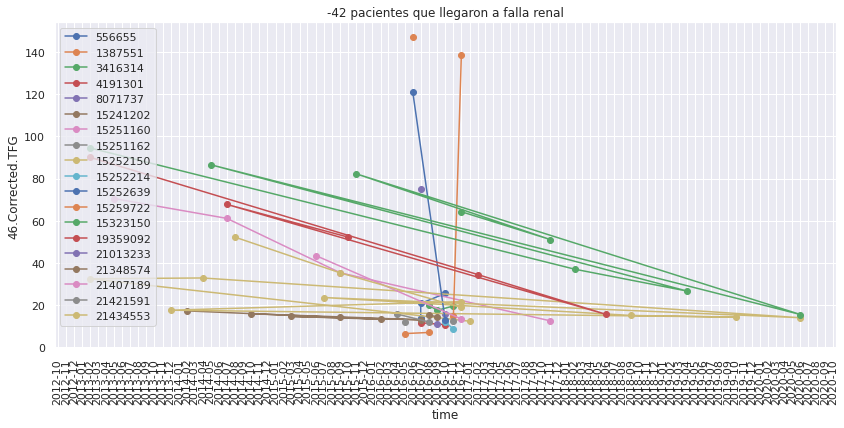

In [23]:
### corrected_calculated_tfg of 20 persons that had falla renal method 1

years_fmt = mdates.DateFormatter('%Y')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format
numids=20

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
i=0
for key, grp in dfF.sort_values(["month", "year"], ascending=True).groupby(["Identificacion"]):
    i+=1
    if i<numids:
        ax.plot(grp['Date'], grp['46.Corrected.TFG'], label=key, marker = 'o')

ax.set_xlabel('time')
ax.set_ylabel('46.Corrected.TFG')
ax.set_title(f'{numids-i} pacientes que llegaron a falla renal')
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')


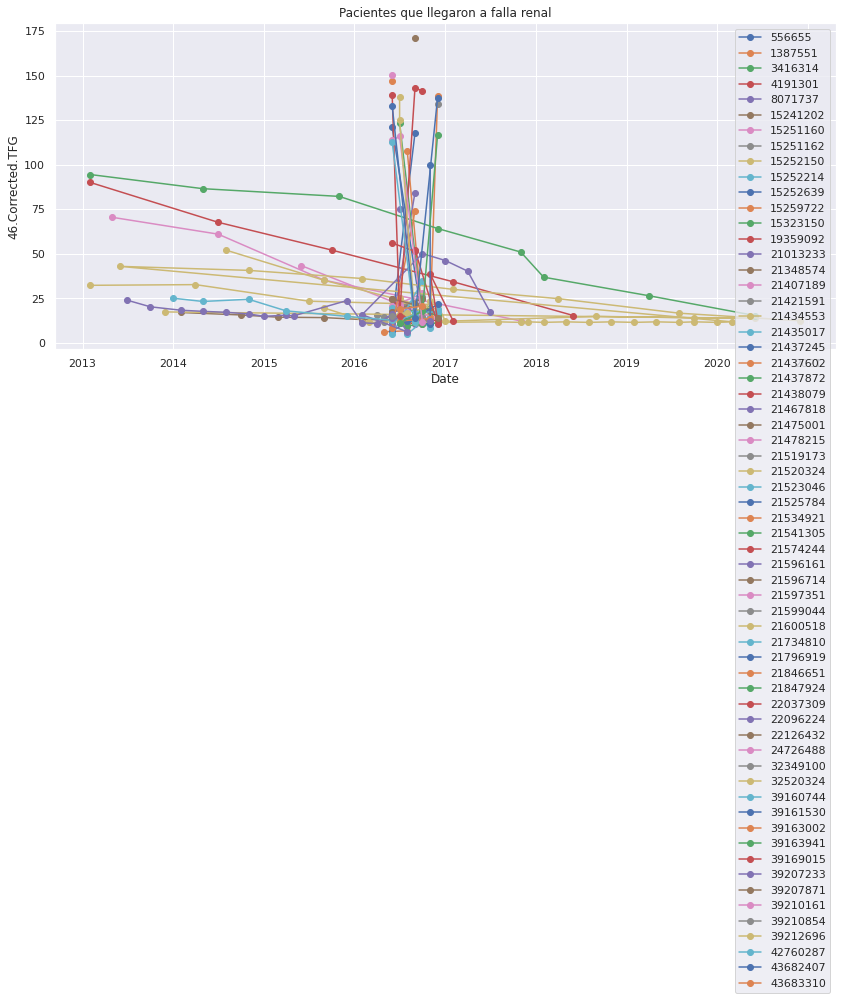

In [24]:
# Better visualization

ndfF=dfF.set_index([dfF['Identificacion'].rename('Id'),dfF['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
fig, ax = plt.subplots(figsize=(14, 6))

for date, new_df in ndfF.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('date').values,
            new_df['46.Corrected.TFG'],
            label = new_df.index.get_level_values('Id').values[0],
            marker = 'o',
            linestyle = '-')

#ax.legend(frameon = True)
ax.set_xlabel('Date')
ax.set_ylabel('46.Corrected.TFG')
ax.set_title('Pacientes que llegaron a falla renal')
plt.show()



# 3D plotting to see better

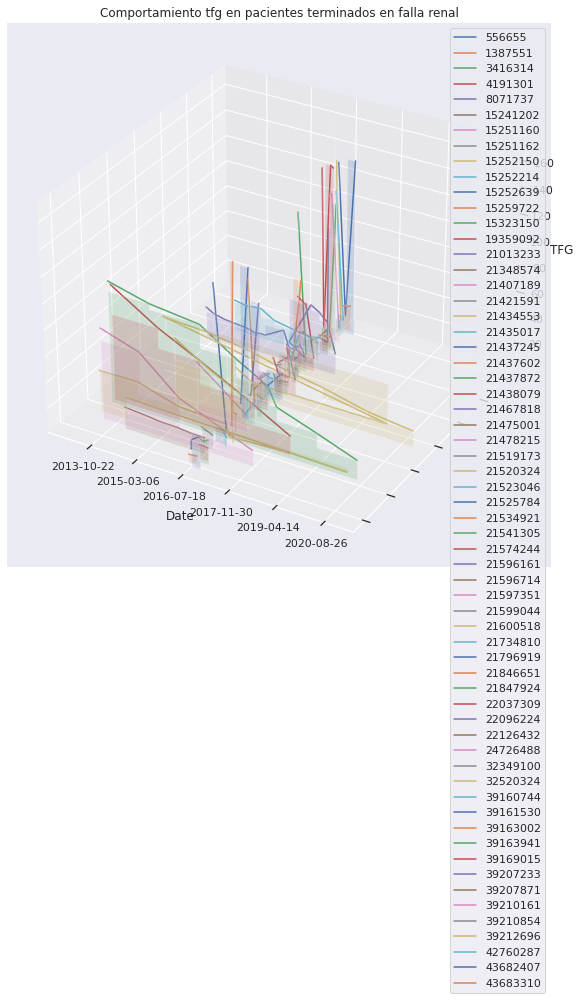

In [25]:
#%matplotlib qt #Si se descomenta esta linea y se comenta la de abajo se puede ver interactivo en un jupyter notebook
%matplotlib inline 
import matplotlib.dates as dates
ndfF=ndfF[ndfF['Date'].notna()]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
z=0
for date, new_df in ndfF.groupby(level = 0):
    x = pd.to_datetime(new_df.index.get_level_values('date').values)
    y = new_df['46.Corrected.TFG'].values
    label= new_df.index.get_level_values('Id').values[0]
    ax.plot(dates.date2num(x), y,z, zdir='y',label=label)
    d2_col_obj = ax.fill_between(dates.date2num(x), 0.5, y, step='pre', alpha=0.1) 
    ax.add_collection3d(d2_col_obj, zs = z, zdir = 'y')
    z+=10
 
    
ax.xaxis.set_major_formatter(dates.AutoDateFormatter(x))
ax.set_xlabel("Date")
ax.set_zlabel("TFG")
ax.yaxis.set_ticklabels([])
#ax.legend(loc='upper right')
ax.set_title('Comportamiento tfg en pacientes terminados en falla renal')
plt.show()

# Behaviour of falla renal

In [26]:
columnstodescribe=['1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos', '13.Peso.Kg', '14.Talla.m',
       '15.IMC', '16.Presion.Art.Sistolica', '17.Presion.Art.Diastolica',
       '18.EstadioRenal1', '19.Creatinina2.mg.dl', '20.BUN1.mg.d',
       '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2', '24.Calcio.mg.dl',
       '25.Fosforo.mEq.L.l', '26.PTH.mg.dl', '27.ColesterolTotal.mg.dl',
       '28.LDLcolest', '29.Colesterol.HDL.mg.dl', '30.Hemoglobina.mg.dl',
       '31.RCV.Rel.AlbuminuriaCreatinuria', '36.creatinina3.mgdl',
       '37.TFG.calculada', '38.EstadioRenal2.calculado', '39.Proteinuria2',
       '40.Proteinuria3', '42.Microalbuminuria2', '44.Microalbuminuria3',
       '46.Corrected.TFG', 'tfg_before', 'tfg_change', 'tfgD_per_month_before',
       'tfgC_per_month_now', 'tfgC_per_month_next']
desc=ndfF.describe()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
desc[columnstodescribe]

,1.Proteinuria1.g/L,2.Microalbuminuria1,3.HbA1C.1,4.Creatinuria.1,5.Creatinina.1,6.Glucemia1,7.Edad,9.Nivel.ingresos,13.Peso.Kg,14.Talla.m,15.IMC,16.Presion.Art.Sistolica,17.Presion.Art.Diastolica,18.EstadioRenal1,19.Creatinina2.mg.dl,20.BUN1.mg.d,21.Albúmina2,22.Glucemia2.mg.dl,23.HbA1C2,24.Calcio.mg.dl,25.Fosforo.mEq.L.l,26.PTH.mg.dl,27.ColesterolTotal.mg.dl,28.LDLcolest,29.Colesterol.HDL.mg.dl,30.Hemoglobina.mg.dl,31.RCV.Rel.AlbuminuriaCreatinuria,36.creatinina3.mgdl,37.TFG.calculada,38.EstadioRenal2.calculado,39.Proteinuria2,40.Proteinuria3,42.Microalbuminuria2,44.Microalbuminuria3,46.Corrected.TFG,tfg_before,tfg_change,tfgD_per_month_before,tfgC_per_month_now,tfgC_per_month_next
count,141.000000,143.000000,148.000000,128.000000,195.000000,180.000000,232.000000,178.000000,227.000000,232.000000,226.000000,163.000000,163.000000,210.000000,202.000000,57.000000,40.000000,47.000000,39.000000,44.000000,39.000000,43.000000,174.000000,85.000000,176.000000,38.000000,16.000000,223.000000,216.000000,223.000000,0.0,0.0,0.0,0.0,216.000000,157.000000,93.000000,93.000000,145.000000,145.000000
mean,0.768801,289.734266,7.031081,3788.203125,2.768359,135.127778,74.512931,1.146067,67.313216,1.539080,27.893230,133.797546,79.024540,3.047619,2.979307,29.508772,3.595000,128.127660,6.702205,7.611364,3.952308,154.139535,212.535632,131.423529,52.693182,12.094737,95.500000,2.912422,86.558657,3.995516,NaN,NaN,NaN,NaN,32.265015,33.044931,-2.568224,NaN,NaN,NaN
std,1.266500,433.886805,1.361914,4289.957835,1.856005,65.230235,12.356880,0.602266,17.543824,0.171717,6.538105,12.904760,9.223528,1.392948,1.956890,16.059179,0.318611,38.622823,2.861191,1.918965,0.390509,16.889813,43.564982,22.957194,15.262161,1.361428,142.936349,1.792671,54.750600,1.373815,NaN,NaN,NaN,NaN,36.289963,36.070220,25.184692,NaN,NaN,NaN
min,0.010000,1.000000,4.800000,295.000000,0.510000,68.000000,35.000000,1.000000,34.000000,0.015200,15.980000,100.000000,45.000000,1.000000,0.690000,6.000000,3.000000,73.000000,0.051000,3.300000,3.100000,98.000000,84.000000,63.000000,7.100000,10.300000,27.000000,0.500000,10.880000,1.000000,NaN,NaN,NaN,NaN,4.840000,4.840000,-124.429369,-inf,-inf,-inf
25%,0.010000,19.000000,6.000000,1123.250000,1.195000,92.000000,64.750000,1.000000,55.000000,1.480000,23.600000,124.500000,70.000000,2.000000,1.455000,16.000000,3.375000,103.500000,6.200000,5.575000,3.700000,145.000000,192.000000,118.000000,42.875000,11.125000,38.500000,1.455000,29.137500,3.500000,NaN,NaN,NaN,NaN,12.597500,12.440000,-6.090000,-1.220000,-1.300000,-1.300000
50%,0.250000,100.000000,6.950000,2655.000000,2.260000,115.000000,76.000000,1.000000,63.000000,1.550000,26.220000,132.000000,80.000000,4.000000,2.080000,28.000000,3.550000,115.000000,7.300000,8.350000,3.900000,160.000000,218.800000,132.000000,53.300000,11.700000,46.000000,2.590000,98.985000,5.000000,NaN,NaN,NaN,NaN,16.485000,17.160000,-1.100000,-0.252000,-0.252000,-0.252000
75%,1.000000,380.000000,7.900000,3438.000000,4.000000,151.250000,83.000000,1.000000,79.000000,1.612500,30.860000,140.000000,89.000000,4.000000,4.405000,41.000000,3.825000,143.500000,8.350000,9.000000,4.150000,165.500000,229.750000,143.000000,59.000000,12.475000,52.000000,4.245000,127.870000,5.000000,NaN,NaN,NaN,NaN,28.345000,35.220000,0.300334,0.075083,0.300334,0.300334
max,5.000000,2500.000000,11.900000,21083.000000,8.430000,600.000000,98.000000,4.000000,113.000000,1.810000,48.410000,168.000000,100.000000,5.000000,9.600000,70.000000,4.300000,234.000000,10.300000,9.800000,4.900000,177.000000,322.600000,201.000000,96.600000,15.600000,461.000000,7.900000,198.330000,5.000000,NaN,NaN,NaN,NaN,171.180556,171.180556,128.300741,inf,inf,inf


# Falla renal time progression

In [27]:
##Describir tiempo promedio y mediana de tiempo de progresión a estadio 5 y pérdida de función renal (pérdida de TFG) anual de los pacientes con estadio 5


#Patients that will have falla renal but still don't until just before they have
FRP = df[(df['Identificacion'].isin(IdsFalla))& (df['38.EstadioRenal2.calculado']!=5)]

Duration=FRP.groupby('Identificacion', as_index=True)['Date'].agg(['min','max'])
#FRP.groupby('Identificacion')['Date'].agg(['min','max']) # get the last date per group

Duration['tiempo_progresion']=Duration['max']-Duration['min']


print('promedio de desarrollo falla renal',Duration.tiempo_progresion.mean(),'Mediana de progresion de falla renal',Duration.tiempo_progresion.median())
Duration

promedio de desarrollo falla renal 215 days 08:43:38.181818180 Mediana de progresion de falla renal 31 days 00:00:00


,min,max,tiempo_progresion
Identificacion,,,
556655,2016-07-01,2016-10-01,92 days
3416314,2016-08-01,2016-11-01,92 days
15241202,2014-02-01,2014-02-01,0 days
15251160,2013-05-01,2015-09-01,853 days
15251162,2016-04-01,2016-04-01,0 days
15252150,2013-02-01,2014-04-01,424 days
15252214,2016-06-01,2016-06-01,0 days
15252639,2016-06-01,2016-06-01,0 days
15259722,2016-06-01,2016-12-01,183 days


In [28]:
#Database of the Patients that will have falla renal but still don't and patients that don't have falla renal
IdsFalla=df[df['38.EstadioRenal2.calculado']==5]['Identificacion'].unique()
dfFP=df[~((df['Identificacion'].isin(IdsFalla))& (df['38.EstadioRenal2.calculado']==5))]
dfFP['Falla_renal']=dfFP['Identificacion'].isin(IdsFalla)



/tmp/ipykernel_4919/845912750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFP['Falla_renal']=dfFP['Identificacion'].isin(IdsFalla)


# Data grouping and visualization

In [30]:
from numpy import nanstd
from numpy import nanmean

fdf=ndf.copy()
fdf.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
fdf.groupby(["38.EstadioRenal2.calculado"]).agg({"tfgC_per_month_next": [nanmean, nanstd]})

tfgC_per_month_next           
                                       nanmean     nanstd
38.EstadioRenal2.calculado                               
1.0                                  -3.026191  18.127954
2.0                                   0.438537   5.000580
3.0                                   0.232271   3.058068
4.0                                   1.165422   7.387904
5.0                                   4.770024  18.926689

/tmp/ipykernel_4919/559579615.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


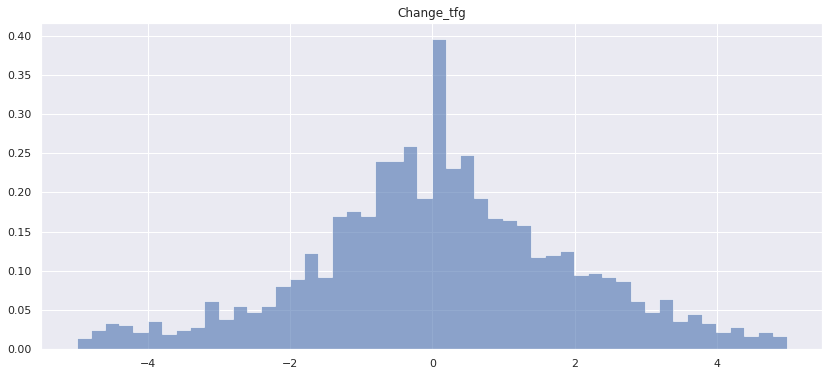

In [31]:
import matplotlib.pyplot as plt
minmax=5.0

fig, ax = plt.subplots(1, 1, figsize=(14, 6)) 
ax.hist(fdf[(fdf['tfgC_per_month_next']< minmax) & (fdf['tfgC_per_month_next']>-minmax)]['tfgC_per_month_next'], density=True, histtype='stepfilled',bins=50, alpha=0.6)#[df['5.Creatinina.1']>0]
ax.set_title('Change_tfg')
fig.show()

In [32]:
# Create buckets of the change to eassily groupby
bins = [-np.inf,-5, -2.5,0, 2.5,5, np.inf]
labels = ["<-5","-5--2.5","-2.5-0","0-2.5","2.5-5",">5"]
fdf['tfgC_CAT'] = pd.cut(fdf['tfgC_per_month_next'], bins=bins, labels=labels)
fdf.groupby(["tfgC_CAT"]).agg({"38.EstadioRenal2.calculado": [nanmean, nanstd]})

38.EstadioRenal2.calculado          
                            nanmean    nanstd
tfgC_CAT                                     
<-5                        1.961165  1.028251
-5--2.5                    2.335616  0.963309
-2.5-0                     2.629870  0.955113
0-2.5                      2.763689  0.875550
2.5-5                      2.379679  0.956143
>5                         2.508475  1.122769

In [33]:
fdf=ndf.copy()
fdf.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
fdf.groupby(["2.Microalbuminuria1"]).agg({"tfgC_per_month_next": [nanmean, nanstd]})
# Need to bucketize to better interpret

tfgC_per_month_next           
                                nanmean     nanstd
2.Microalbuminuria1                               
1.0                           -0.939780   3.115419
2.0                            0.361394   6.597629
3.0                           -0.414943   9.319859
4.0                           -1.185200  12.949716
5.0                           -0.749853  11.593198
6.0                           -0.212136   6.796293
7.0                            0.226227   5.095875
8.0                            0.543720   4.216440
9.0                           -3.460063   5.348776
10.0                          -1.031896   3.355974
11.0                          -2.040472   9.523116
12.0                           0.483399   2.229248
13.0                           0.288852   2.845182
14.0                           1.131614   1.554771
15.0                           0.884303   2.894569
16.0                           0.489802   2.066743
17.0                          -0.676287   1.943637
18.0                          -0.047600   2.539780
19.0                           0.245840   1.603342
20.0                          -1.122252   2.210052
21.0                           1.094097   2.982679
22.0                                NaN        NaN
23.0                          -0.400288   0.346809
24.0                          -2.047125   2.784809
25.0                          -9.353694  16.262930
26.0                          -1.427821   3.015481
27.0                          -0.634050        NaN
28.0                           1.918367   6.045885
29.0                          -0.696247   1.508548
30.0                           0.193312   1.458573
31.0                          -0.126894   1.404464
32.0                          -0.490941   0.694295
33.0                           0.186086        NaN
34.0                           1.735000        NaN
35.0                          -0.310802   3.604914
36.0                           0.713222   0.942014
37.0                          -0.836333   2.122476
38.0                          -1.718559   1.888978
39.0                                NaN        NaN
40.0                           0.206492   0.896578
41.0                          -1.509925   1.417565
42.0                           2.603466        NaN
43.0                          -0.651161        NaN
44.0                          -0.324805   2.838588
45.0                          -0.576449        NaN
46.0                           0.066487   2.213819
47.0                          -0.488487   1.249915
48.0                          49.482500        NaN
49.0                          -0.836977        NaN
50.0                           2.299032        NaN
52.0                           0.271296   1.966555
53.0                           1.081817   4.810353
54.0                          -1.510717   2.252620
55.0                          -0.756863   0.216568
56.0                           1.385722   1.584816
57.0                          17.200004        NaN
58.0                           0.000000        NaN
59.0                           1.472772        NaN
60.0                          -2.074000        NaN
61.0                           2.357744   4.847563
62.0                          -1.766510        NaN
63.0                           0.317776   0.673588
64.0                           0.180000        NaN
65.0                          -2.106578   2.837572
66.0                          -4.540243        NaN
67.0                           0.415943        NaN
68.0                         -23.499933  36.703467
70.0                           2.473333   0.844198
71.0                                NaN        NaN
72.0                          -0.658105   2.736778
75.0                           0.325399   1.192114
76.0                          -1.613392        NaN
77.0                           0.100111        NaN
78.0                          16.900772  24.241497
79.0                           6.215392        NaN
80.0                          -1.347306   

# Predicting if a patient is going to have falla renal


In [34]:
IdsFalla=df[df['38.EstadioRenal2.calculado']==5]['Identificacion'].unique()
df['Falla_renal']=df['Identificacion'].isin(IdsFalla)


In [35]:
df.columns

Index(['year', 'month', 'Identificacion', '1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '8.Sexo', '9.Nivel.ingresos',
       '10.Nivel.ingresos', '11.Estado.civil', '12.Tipo.afiliacion.SGSSS',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '18.EstadioRenal1', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria', '32.EPS',
       '33.IPS', '34.TipoID', '35.Fecha.ultimavalidacion',
       '36.creatinina3.mgdl', '37.TFG.calculada', '38.EstadioRenal2.calculado',
       '39.Proteinuria2', '40.Proteinuria3', '41.FECHA.Proteinuria3',
       '42.Microalbuminuria2', '43.FECHA.Microalbuminuria2',
  

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_before',
       'tfgD_per_month_before','Falla_renal']################### Acá está el orden de las features #

df=dfFP[important_base_columns]

df = df[df['Falla_renal'].notna()]
df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
features = pd.get_dummies(df)


labels = np.array(features['Falla_renal'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Falla_renal', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 123)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3280, 35)
Training Labels Shape: (3280,)
Testing Features Shape: (1094, 35)
Testing Labels Shape: (1094,)


In [37]:
# Random forest training

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


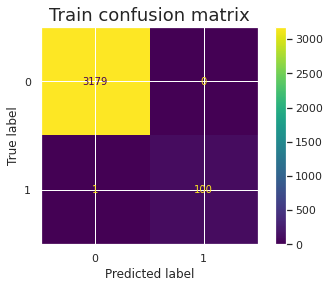

tn =  3179 fp = 0 fn = 1 tp = 100
precisión train= 1.0
accuracy train= 0.9996951219512196
ROC AUC train = 0.995049504950495
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3179
        True       1.00      0.99      1.00       101

    accuracy                           1.00      3280
   macro avg       1.00      1.00      1.00      3280
weighted avg       1.00      1.00      1.00      3280



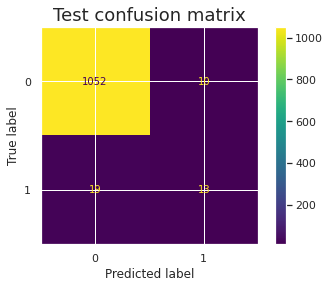

tn =  1052 fp = 10 fn = 19 tp = 13
precisión = 0.5652173913043478
accuracy = 0.973491773308958
ROC AUC = 0.698416902071563
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1062
        True       0.57      0.41      0.47        32

    accuracy                           0.97      1094
   macro avg       0.77      0.70      0.73      1094
weighted avg       0.97      0.97      0.97      1094



In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score
from sklearn.metrics import roc_auc_score,recall_score,classification_report

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué


### Train metrics

predictions2 = rf.predict(train_features_imp)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(train_labels, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(train_labels, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(train_labels, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(train_labels,y_pred_class2))

print(classification_report(train_labels, y_pred_class2))

### Test metrics
y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, y_pred_class))

print(classification_report(test_labels, y_pred_class))

#### 1 es falla renal

Text(0.5, 0, 'Random Forest Feature Importance')

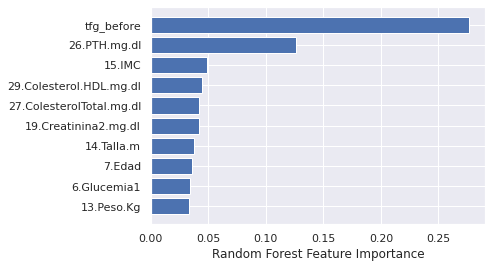

In [39]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

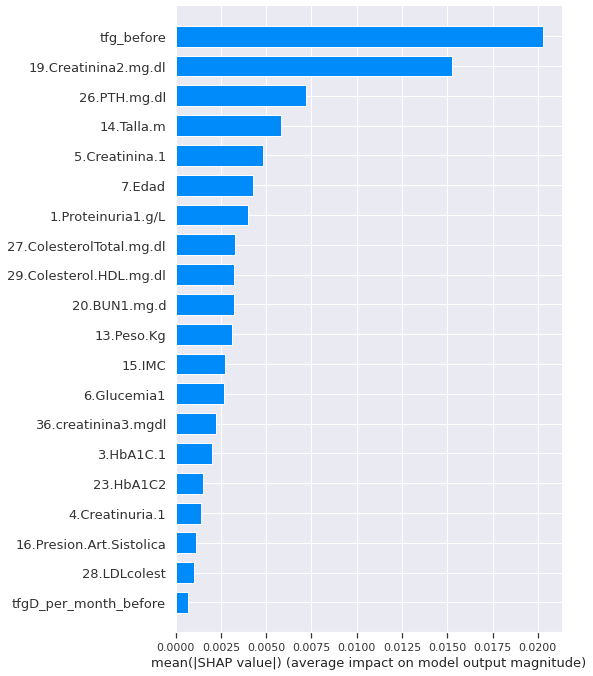

In [40]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

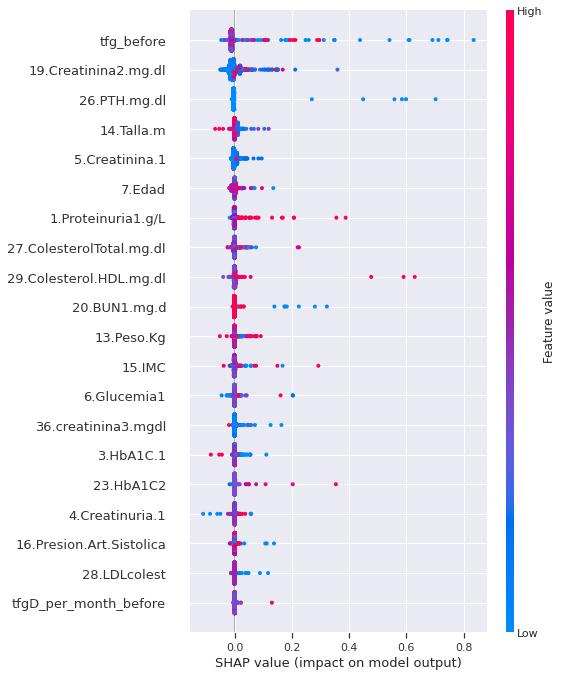

In [41]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# Model of sparse logistic regression

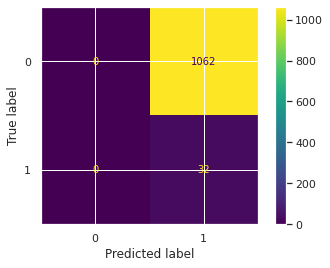

tn =  0 fp = 1062 fn = 0 tp = 32
precisión = 0.029250457038391225
accuracy = 0.029250457038391225
ROC AUC = 0.5
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1062
        True       0.03      1.00      0.06        32

    accuracy                           0.03      1094
   macro avg       0.01      0.50      0.03      1094
weighted avg       0.00      0.03      0.00      1094



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,recall_score,classification_report


scaler = preprocessing.StandardScaler().fit(train_features_imp)
X_scaled = scaler.transform(train_features_imp)

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_scaled, train_labels)

test_features_imp = imp.transform(test_features)
predictions = logisticRegr.predict(test_features_imp)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué
### Train metrics

predictions2 = logisticRegr.predict(train_features_imp)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(train_labels, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(train_labels, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(train_labels, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(train_labels,y_pred_class2))

print(classification_report(train_labels, y_pred_class2))

### Test metrics



y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, y_pred_class))

print(classification_report(test_labels, y_pred_class))

# Xgboost model

In [44]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_before',
       'tfgD_per_month_before','Falla_renal']################### Acá está el orden de las features #

df=dfFP[important_base_columns]
df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = pd.get_dummies(df)

colnames=df.columns

X, y = df.drop(columns=['Falla_renal']),df['Falla_renal']
feature_list=list(X.columns)

data_dmatrix = xgb.DMatrix(data=X,label=y,enable_categorical=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)







xg_reg = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)#quitar este para otras validaciones: seed=27 para 
    

xg_reg.fit(X_train,y_train,verbose=True)#eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='logloss',verbose=True)







A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [45]:
#### Profiling the split of the dataset
#from pandas_profiling import ProfileReport
#import pandas as pd
#import matplotlib.pyplot as plt

Pdf=X_train.copy()
Pdf['Falla_renal']=y_train
#profile = ProfileReport(Pdf, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTrain70.html")
                
PdfTest = X_test.copy()
PdfTest['Falla_renal'] = y_test
#profile = ProfileReport(PdfTest, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTest30.html")


with pd.ExcelWriter('BasedatosClassif.xlsx') as writer:  
    Pdf.to_excel(writer, sheet_name='70%')
    PdfTest.to_excel(writer, sheet_name='30%')

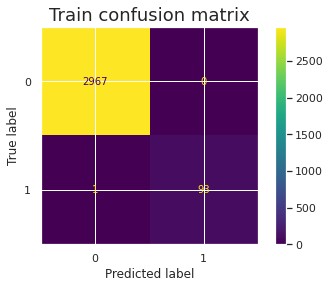

tn =  2967 fp = 0 fn = 1 tp = 93
precisión train= 1.0
accuracy train= 0.999673309376021
ROC AUC train = 0.9946808510638299
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2967
        True       1.00      0.99      0.99        94

    accuracy                           1.00      3061
   macro avg       1.00      0.99      1.00      3061
weighted avg       1.00      1.00      1.00      3061



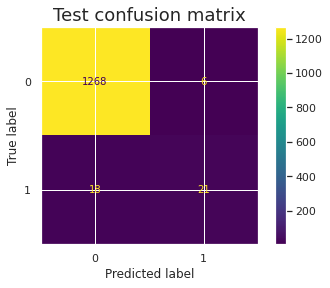

tn =  1268 fp = 6 fn = 18 tp = 21
precisión test= 0.7777777777777778
accuracy test= 0.9817212490479817
ROC AUC test = 0.7668759811616954
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1274
        True       0.78      0.54      0.64        39

    accuracy                           0.98      1313
   macro avg       0.88      0.77      0.81      1313
weighted avg       0.98      0.98      0.98      1313



In [46]:
from sklearn.metrics import roc_auc_score,recall_score,classification_report
predictions = xg_reg.predict(X_test)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics

predictions2 = xg_reg.predict(X_train)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(y_train, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(y_train, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(y_train, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(y_train,y_pred_class2))

print(classification_report(y_train, y_pred_class2))

### Test metrics

y_pred_class = predictions > threshold
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)

plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(y_test, y_pred_class)
print('precisión test=',precision)

accuracy = accuracy_score(y_test, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy test=',accuracy)

print('ROC AUC test =',roc_auc_score(y_test, predictions))

print(classification_report(y_test, y_pred_class))





Text(0.5, 0, 'Random Forest Feature Importance')

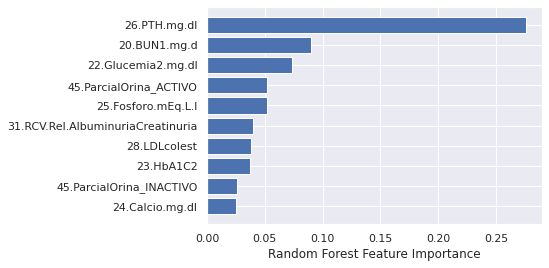

In [47]:
# FEature importance
# Number of features to see:
ns=10
tot=len(xg_reg.feature_importances_)
sorted_idx = xg_reg.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, xg_reg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


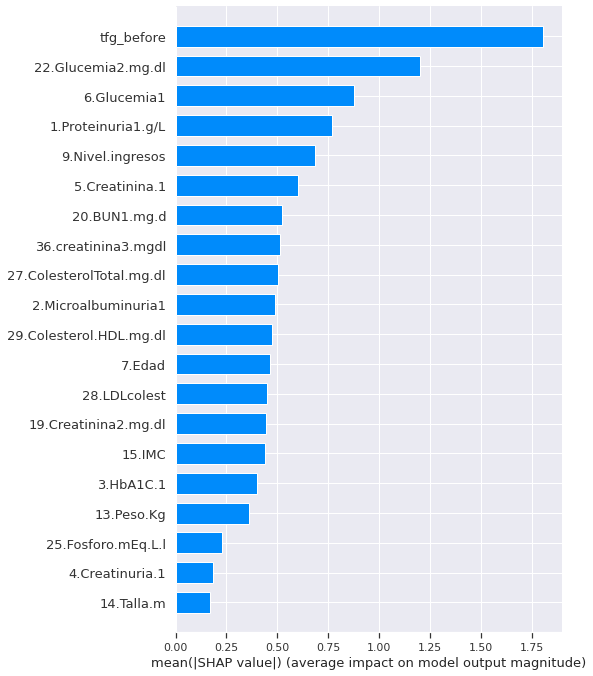

In [48]:
import shap
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

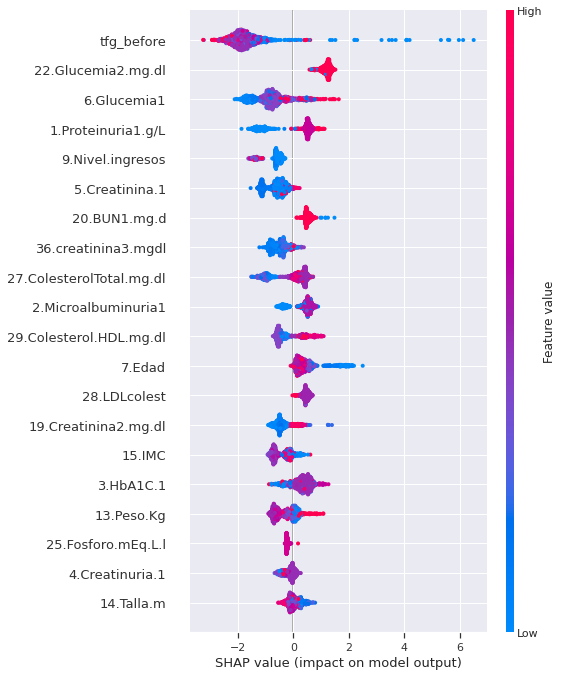

In [49]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

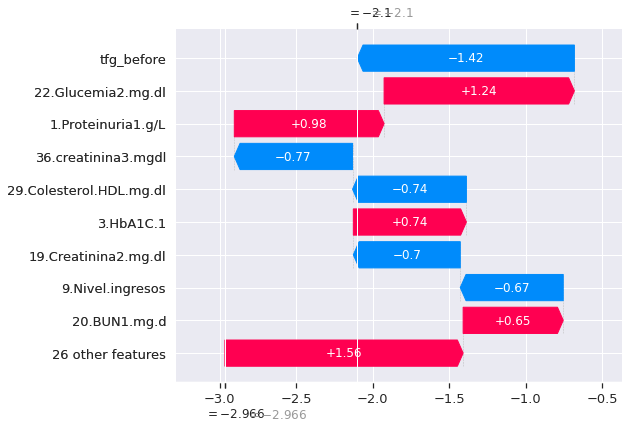

In [50]:
# To see the shap value of an individual predictor, in this case is the pavcient 0

#shap.plots.waterfall(shap_values[0])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0],feature_names=feature_list)

In [51]:
# in this case is the pacient 0
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[1],feature_names=feature_list)


# Better Imputations

In [52]:
# Imputing with linear interpolation based on time series

important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_before',
       'tfgD_per_month_before']################### Acá está el orden de las features #

df=dfFP[important_base_columns]
df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
features = pd.get_dummies(df)
linear_interpolation = features.interpolate(method='linear')



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.model_selection import train_test_split

important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_before',
       'tfgD_per_month_before']################### Acá está el orden de las features #

df=dfFP[important_base_columns]
df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
features = pd.get_dummies(df)
df_mice = features.copy()


# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
labels = np.array(dfFP['Falla_renal'])
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_mice_imputed, labels, test_size = 0.25, random_state = 123)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (3280, 35)
Training Labels Shape: (3280,)
Testing Features Shape: (1094, 35)
Testing Labels Shape: (1094,)


# Random forest with new imputations

In [92]:
# Import the model we are using and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)










RandomForestRegressor(n_estimators=1000, random_state=42)

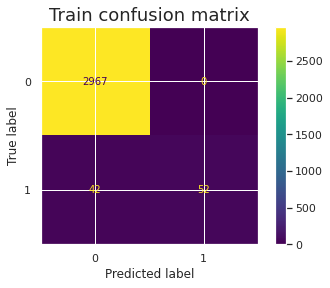

tn =  2967 fp = 0 fn = 42 tp = 52
precisión test= 1.0
accuracy test= 0.9862789937928781
ROC AUC test = 0.7765957446808511
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2967
        True       1.00      0.55      0.71        94

    accuracy                           0.99      3061
   macro avg       0.99      0.78      0.85      3061
weighted avg       0.99      0.99      0.98      3061



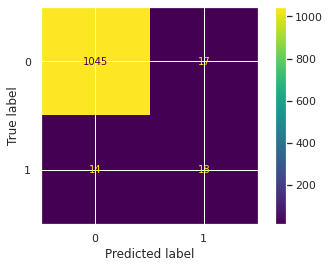

tn =  1045 fp = 17 fn = 14 tp = 18
precisión = 0.5142857142857142
accuracy = 0.9716636197440585
ROC AUC = 0.7732462335216572
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      1062
        True       0.51      0.56      0.54        32

    accuracy                           0.97      1094
   macro avg       0.75      0.77      0.76      1094
weighted avg       0.97      0.97      0.97      1094



In [93]:
predictions = rf.predict(test_features)

threshold=0.3 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics

predictions2 = xg_reg.predict(X_train)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(y_train, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(y_train, y_pred_class2)
print('precisión test=',precision)

accuracy = accuracy_score(y_train, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy test=',accuracy)

print('ROC AUC test =',roc_auc_score(y_train,y_pred_class2))

print(classification_report(y_train, y_pred_class2))

### Test metrics
y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, y_pred_class))

print(classification_report(test_labels, y_pred_class))
#### 1 es falla renal

In [91]:
predictions2[]

array([0, 0, 0, ..., 0, 0, 0])

# Imputation with mice made it worse 

# Optimizing  random forest

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

rf_random.cv_results_
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
#OPTIMIZING the regressor based on Mean Squared error
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_features, train_labels)
grid_search.best_params_
best_grid = grid_search.best_estimator_

In [59]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 900}

In [60]:
grid_search.best_score_

0.2668332837527268

In [61]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 30,
 max_features = 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 1000, random_state = 123)

rf = RandomForestRegressor(bootstrap= True'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 40,)

# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1000,
                      random_state=123)

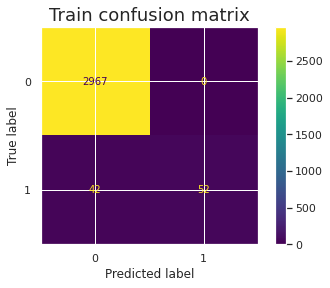

tn =  2967 fp = 0 fn = 42 tp = 52
precisión train= 1.0
accuracy train= 0.9862789937928781
ROC AUC train = 0.7765957446808511
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2967
        True       1.00      0.55      0.71        94

    accuracy                           0.99      3061
   macro avg       0.99      0.78      0.85      3061
weighted avg       0.99      0.99      0.98      3061



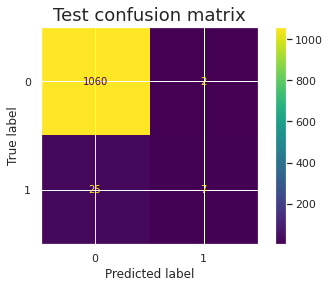

tn =  1060 fp = 2 fn = 25 tp = 7
precisión = 0.7777777777777778
accuracy = 0.9753199268738574
ROC AUC = 0.9519479755178908
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1062
        True       0.78      0.22      0.34        32

    accuracy                           0.98      1094
   macro avg       0.88      0.61      0.66      1094
weighted avg       0.97      0.98      0.97      1094



In [76]:
predictions = rf.predict(test_features)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics

predictions2 = rf.predict(X_train)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(y_train, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(y_train, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(y_train, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(y_train,predictions2))

print(classification_report(y_train, predictions2))

### Test metrics
y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, predictions))# This handles continuous variables

print(classification_report(test_labels, y_pred_class))

# Trying the random Forest Classifier with no optimization, SPOILER: Not as good

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

rf = RandomForestClassifier(n_estimators=1000,
                      random_state=123)

# Train the model on training data
rf.fit(train_features_imp, train_labels)


RandomForestClassifier()

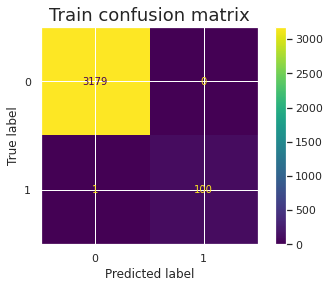

tn =  3179 fp = 0 fn = 1 tp = 100
precisión train= 1.0
accuracy train= 0.9996951219512196
ROC AUC train = 0.995049504950495
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3179
        True       1.00      0.99      1.00       101

    accuracy                           1.00      3280
   macro avg       1.00      1.00      1.00      3280
weighted avg       1.00      1.00      1.00      3280



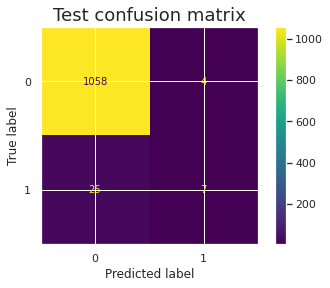

tn =  1058 fp = 4 fn = 25 tp = 7
precisión = 0.6363636363636364
accuracy = 0.973491773308958
ROC AUC = 0.6074917608286252
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1062
        True       0.64      0.22      0.33        32

    accuracy                           0.97      1094
   macro avg       0.81      0.61      0.66      1094
weighted avg       0.97      0.97      0.97      1094



In [89]:

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics
predictions2 = rf.predict(train_features_imp)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(train_labels, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(train_labels, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(train_labels, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(train_labels,predictions2))

print(classification_report(train_labels, predictions2))

### Test metrics
y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, predictions))# This handles continuous variables

print(classification_report(test_labels, y_pred_class))

# Random forest classifier optimizating recall

In [99]:
#OPtimizing this classifier to maximize recall, and only punish false negatives
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 15, 25],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 2],
    'min_samples_split': [2, 3, 1],
    'n_estimators': [400, 1500,700]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1)
# Instantiate the grid search model

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(rf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(train_features, train_labels)

    # make the predictions
    y_pred = grid_search.predict(test_features)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(test_labels, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

grid_search_clf = grid_search_wrapper(refit_score='recall_score')# Optimizing based on recall score

grid_search_clf


/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3

/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estevelag/anaconda3/envs/kaggle/lib/python3


180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/home/estevelag/anaconda3/envs/kaggle/lib/python3.9/site-packages/joblib/parallel.py", line 935, in 

Best params for recall_score
{'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1500}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      1062         0
pos        25         7


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 15, 25],
                         'max_features': ['sqrt'], 'min_samples_leaf': [3, 2],
                         'min_samples_split': [2, 3, 1],
                         'n_estimators': [400, 1500, 700]},
             refit='recall_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [ ]:
predictions = grid_search_clf.predict_proba(test_features_imp)
threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics
predictions2 = rf.predict(train_features_imp)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(train_labels, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(train_labels, y_pred_class2)
print('precisión train=',precision)

accuracy = accuracy_score(train_labels, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy train=',accuracy)

print('ROC AUC train =',roc_auc_score(train_labels,predictions2))

print(classification_report(train_labels, predictions2))

### Test metrics
y_pred_class = predictions > threshold
cm = confusion_matrix(test_labels, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)
plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(test_labels, y_pred_class)
print('precisión =',precision)

accuracy = accuracy_score(test_labels, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy =',accuracy)

print('ROC AUC =',roc_auc_score(test_labels, predictions))# This handles continuous variables

print(classification_report(test_labels, y_pred_class))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


     pred_neg  pred_pos
neg      1050        12
pos        20        12


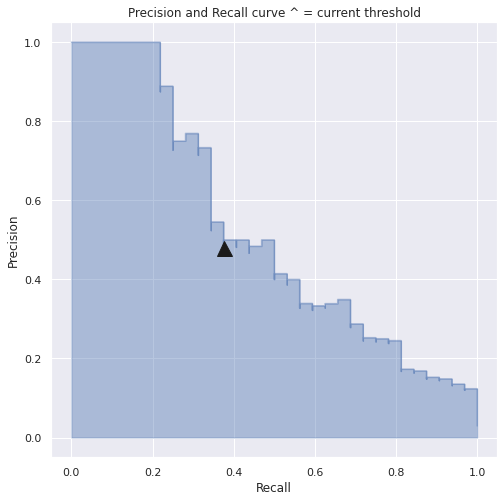

In [111]:
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
from sklearn.metrics import roc_curve, precision_recall_curve

NT= 0.30# New more down threshold

y_scores = grid_search_clf.predict_proba(test_features_imp)[:, 1]



def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(test_labels, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.4,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.4,
                     color='b')
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',markersize=15)
    

p, r, thresholds = precision_recall_curve(test_labels, y_scores)

precision_recall_threshold(p, r, thresholds, NT)



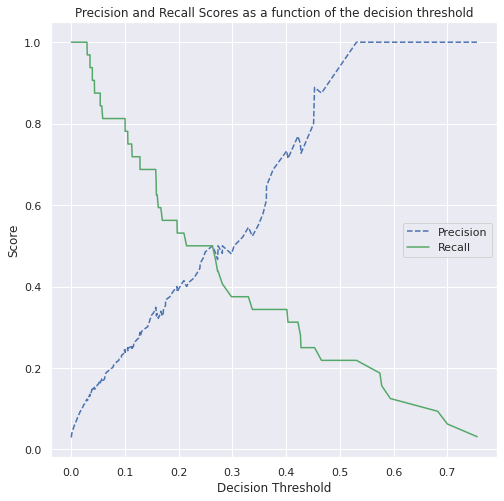

In [103]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9529778719397364


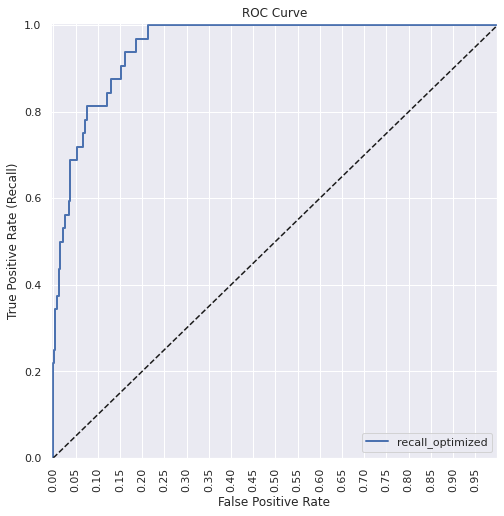

In [105]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    
fpr, tpr, auc_thresholds = roc_curve(test_labels, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

# Optimizing xgboost

In [63]:
#scale_pos_weight=5 this is to impose greater penalties for errors on the minor class, in this case any incidences of 1 in the response variable

#https://towardsdatascience.com/boosting-techniques-in-python-predicting-hotel-cancellations-62b7a76ffa6c

# Without the binary logistic objective and scale pos weight before


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,recall_score


important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_before',
       'tfgD_per_month_before','Falla_renal']################### Acá está el orden de las features #

df=dfFP[important_base_columns]
df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = pd.get_dummies(df)

colnames=df.columns

X, y = df.drop(columns=['Falla_renal']),df['Falla_renal']
feature_list=list(X.columns)

data_dmatrix = xgb.DMatrix(data=X,label=y,enable_categorical=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)







xg_reg = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3, seed=27)#quitar este para otras validaciones: seed=27 para 
    





A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
# Tunning max_depth and min_child weight

from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=3, seed=27,score='recall'), 
param_grid = param_test1, scoring='recall',n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_
gsearch1.best_estimator_

[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time= 1.9min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.3min
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.3min
[CV] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time= 1.8min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.7min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.8min
[CV] END bootstrap=False, max_depth=90, min_samples_

[CV] END bootstrap=False, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  42.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 1.5min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.8min
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  23.4s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time= 2.2min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 2.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  26.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  26.9s
[CV] END bootstrap=True, max_depth=30, min_sample

[23:40:52] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:41:16] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:41:21] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagg

[23:40:52] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:40:56] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:41:09] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagg

[23:40:52] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:40:55] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:41:00] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagg


[23:43:40] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:43:54] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:44:06] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flag

[23:47:39] WARNING: ../src/learner.cc:627: 
Parameters: { "score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [65]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [66]:
# Tunning gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test3,scoring= 'recall',n_jobs=-1, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_
gsearch3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [67]:
# tunning subsample and colsample
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test5,scoring= 'recall',n_jobs=-1, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_
gsearch5.best_estimator_.subsample,gsearch5.best_estimator_.colsample_bytree

(0.8, 0.8)

In [68]:
# tunning reg alpha
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test6,scoring= 'recall',n_jobs=-1, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.cv_results_
gsearch6.best_estimator_.reg_alpha


1e-05

In [69]:
# reducing learning rate and incrementing trees for final model

xg_reg= xgb.XGBClassifier( learning_rate = 0.005, n_estimators=1000, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27,reg_alpha = 1e-05)

xg_reg.fit(X_train,y_train,verbose=True)#eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='logloss',verbose=True)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=1e-05, ...)

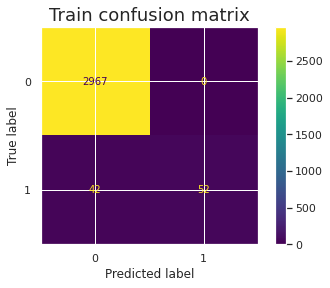

tn =  2967 fp = 0 fn = 42 tp = 52
precisión test= 1.0
accuracy test= 0.9862789937928781
ROC AUC test = 0.7765957446808511
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2967
        True       1.00      0.55      0.71        94

    accuracy                           0.99      3061
   macro avg       0.99      0.78      0.85      3061
weighted avg       0.99      0.99      0.98      3061



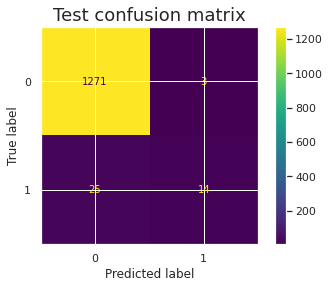

tn =  1271 fp = 3 fn = 25 tp = 14
precisión test= 0.8235294117647058
accuracy test= 0.9786747905559787
ROC AUC test = 0.6783097854526428
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1274
        True       0.82      0.36      0.50        39

    accuracy                           0.98      1313
   macro avg       0.90      0.68      0.74      1313
weighted avg       0.98      0.98      0.97      1313



In [70]:
from sklearn.metrics import roc_auc_score,recall_score,classification_report
predictions = xg_reg.predict(X_test)

threshold=0.5 # Esto se puede bajar dependiendo de lo que se quiera si mas sensibilidad o qué

### Train metrics

predictions2 = xg_reg.predict(X_train)
y_pred_class2 = predictions2 > threshold
cmA = confusion_matrix(y_train, y_pred_class2)
tnA, fpA, fnA, tpA = cmA.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cmA)
disp.plot()
plt.title('Train confusion matrix', fontsize=18)
plt.show()
print('tn = ',tnA,'fp =',fpA,'fn =',fnA,'tp =',tpA)

precision = precision_score(y_train, y_pred_class2)
print('precisión test=',precision)

accuracy = accuracy_score(y_train, y_pred_class2) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy test=',accuracy)

print('ROC AUC test =',roc_auc_score(y_train,y_pred_class2))

print(classification_report(y_train, y_pred_class2))

### Test metrics

y_pred_class = predictions > threshold
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Test confusion matrix', fontsize=18)

plt.show()
print('tn = ',tn,'fp =',fp,'fn =',fn,'tp =',tp)

precision = precision_score(y_test, y_pred_class)
print('precisión test=',precision)

accuracy = accuracy_score(y_test, y_pred_class) # or optionally (tp + tn) / (tp + fp + fn + tn) 
print('accuracy test=',accuracy)

print('ROC AUC test =',roc_auc_score(y_test, predictions))

print(classification_report(y_test, y_pred_class))


# Cross validation



In [ ]:
from sklearn.model_selection import cross_validate
# Perform cross-validation: scores
scores = cross_validate(xg_reg, X_train, y_train,n_jobs=-1, cv=5,scoring=('roc_auc'),return_train_score=True)
# Print cv_results
scores

# For imbalanced datasets https://stackoverflow.com/questions/62447776/xgboost-model-performance